# Homework 5

<br>
<b>
    
1. With the provided image (2faces.jpg), find the face location and  display the face with rectangles drawn on the face.<br><br>

2. Using the face location, crop the first face and display it and then save it to a file.<br><br>

3. With the saved image from #2, plot the landmark points in black on the face using mediapipe as I showed above.<br><br>

4. Display the Delaunay Tessellation in black on the face saved from #2 using mediapipe as I showed above.<br><br>

5. Repeat the average face example only using female faces and display the average face.<br><br>

6. Repeat the average face example only using male faces and display the average face.<br><br>

7. What differences do you see between the averaged female and male faces?<br><br>
</b>

In [1]:
!pip install mediapipe
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 431.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 412.6 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [2]:
import sys
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt  # used to plot our images
import cv2  # opencv 4.1.2 to read images
import urllib.request as urlreq
import numpy as np

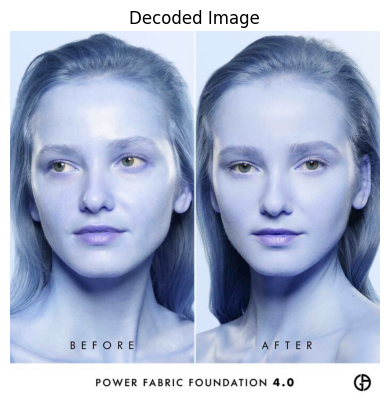

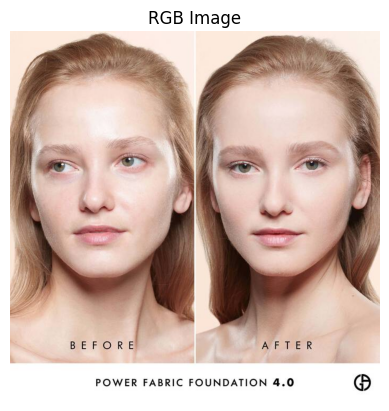

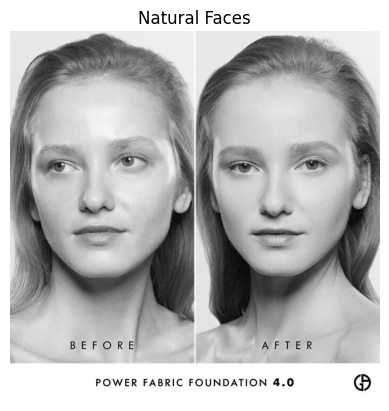

Faces Locations:
 [[ 18 124 310 310]
 [353 132 310 310]]


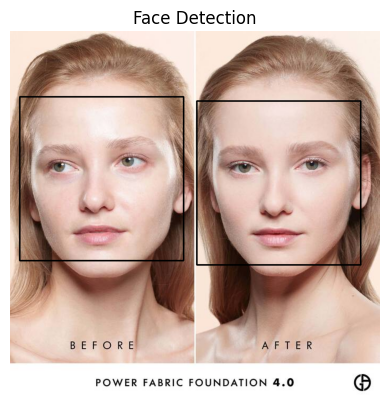

In [5]:
#Q1 With the provided image (2faces.jpg), find the face location and display the face with rectangles drawn on the face.

# read image with openCV
url = 'https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/refs/heads/main/2faces.jpg'
s = urlreq.urlopen(url)
img_array = np.array(bytearray(s.read()), dtype=np.uint8)

#  cv2.imdecode() function reads data from specified memory cache and converts (decodes) data into image format
image = cv2.imdecode(img_array, -1)

# plot image with matplotlib package
plt.axis('off')
plt.title('Decoded Image')
plt.imshow(image, cmap='gray')
plt.show()

####  image process the image
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.axis('off')
plt.title('RGB Image')
plt.imshow(image_rgb)
plt.show()

# create a copy of the image to be used later
image_template = image_rgb.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis('off')
plt.title('Natural Faces')
plt.imshow(image_gray, cmap='gray')
plt.show()

# create an instance of the Face Detection Cascade Classifier
#  https://github.com/opencv/opencv/tree/master/data/haarcascades
#ppath = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/Fall_2023/Lectures/Lecture_2_3_4_5/haarcascade_frontalface_default.xml'
ppath = '/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(ppath)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)

# Print coordinates of detected faces
print('Faces Locations:\n', faces)

for face in faces:
#  save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
# Draw a black colored rectangle around each face using the face's coordinates
#   on the "image_template" with the thickness of 2
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(0, 0, 0), 2)

plt.axis('off')
plt.title('Face Detection')
plt.imshow(image_template)
plt.show()


Original image


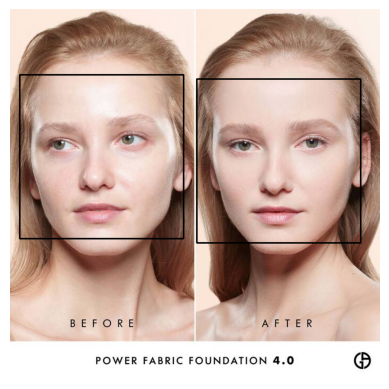

[[ 18 124 310 310]
 [353 132 310 310]]

 Just the face


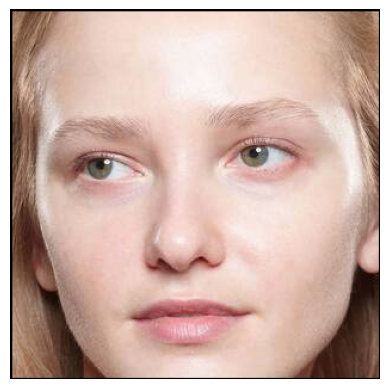

In [6]:
#Q2 Using the face location, crop the first face and display it and then save it to a file.
from PIL import Image
img = Image.fromarray(image_template)
print('\nOriginal image')
plt.axis('off')
plt.imshow(img)
plt.show()

print(faces)

'''
#  save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
# Draw a black colored rectangle around each face using the face's coordinates
#   on the "image_template" with the thickness of 2
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(0, 0, 0), 2)
'''
x, y, w, d = faces[0]

face1 = img.crop((x,y,(x+w),(y+d)))
print('\n Just the face')
plt.axis('off')
plt.imshow(face1)
plt.show()

face1.save('/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/face1.jpg')

In [7]:
import mediapipe as mp

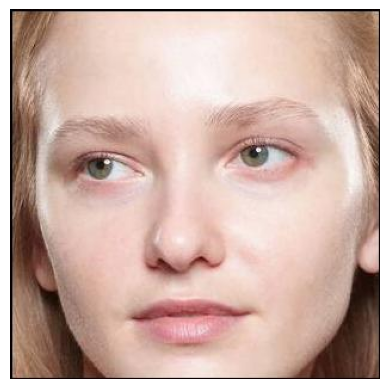


Heigth and width of image: 310 310


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


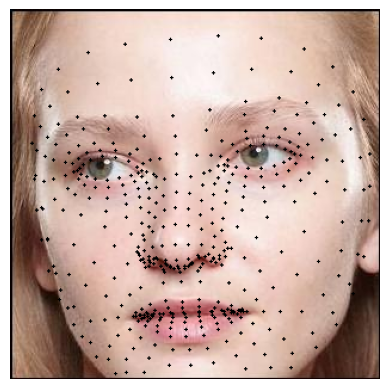

In [8]:
#Q3 With the saved image from #2, plot the landmark points in black on the face using mediapipe as I showed above.

# read image with openCV
path = '/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/face1.jpg'
image = cv2.imread(path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #  fix the colors

plt.axis("off")
plt.imshow(rgb_image)
plt.show()

# Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh() # https://google.github.io/mediapipe/solutions/face_mesh.html

# Facial landmarks
result = face_mesh.process(rgb_image)

height, width, _ = rgb_image.shape
print('\nHeigth and width of image:', height, width)

for facial_landmarks in result.multi_face_landmarks:
    for i in range(0, 468):  # https://google.github.io/mediapipe/solutions/face_mesh.html
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        cv2.circle(rgb_image, (x, y), 1, (0, 0, 0), -1)

plt.axis("off")
plt.imshow(rgb_image)
plt.show()

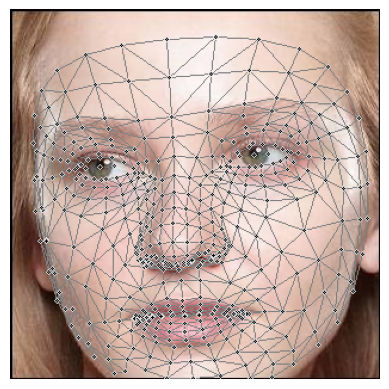

In [9]:
#Q4 Display the Delaunay Tessellation in black on the face saved from #2 using mediapipe as I showed above.
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=1)

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    # Read image file with cv2 and process with face_mesh
    path = '/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/face1.jpg'
    image = cv2.imread(path)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define boolean corresponding to whether or not a face was detected in the image
face_found = bool(results.multi_face_landmarks)

if face_found:
    # Create a copy of the image
    annotated_image = image.copy()

    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

    # Save image
    cv2.imwrite('face_tesselation_only.png', annotated_image)

# Open image
img = Image.open('face_tesselation_only.png')
plt.axis("off")
plt.imshow(img)
plt.show()

399
0.0


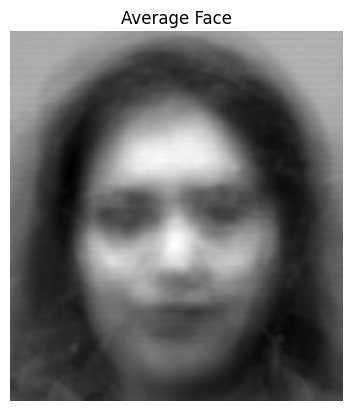

In [28]:
#Q5 Repeat the average face example only using female faces and display the average face.

#  average face example
import glob
from cv2 import imread

#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
#dir = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/faces94/**/**.jpg'
dir = '/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/female/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')

print(len(files))
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

2260


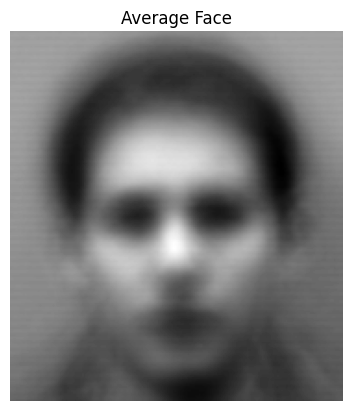

In [29]:
#Q6 Repeat the average face example only using male faces and display the average face.

#  average face example

#  https://cmp.felk.cvut.cz/~spacelib/faces/faces94.html
#dir = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/faces94/**/**.jpg'
dir = '/content/drive/MyDrive/Colab Notebooks/CDS468/Homeworks/faces94/male/**/**.jpg'
files = list(glob.iglob(dir, recursive=True))
img = np.zeros(imread(files[0],0).shape)
img = img.astype('int')

print(len(files))
for i in range(len(files)):
    img += imread(files[i],0).astype('uint8')

img = np.divide(img,len(files))
img = np.mod(img,256)
img = img.astype(np.uint8)

plt.axis('off')
plt.title('Average Face')
plt.imshow(img, cmap='gray')
plt.show()

#Q7 What differences do you see between the averaged female and male faces?

For one, the male face looks very close to the average of all of the faces from the in class example. Which makes sense as discussed in class, the total average face had much 133 males vs 20 female faces to sample.

The differences between the female and male average faces include: general face shape (f: rounder, m: more oval), hair (f:longer, m: shorter), forehead size/shape, males had a more proment nose, males seemed to have more sunken in eyes, males had a more distinct jaw and chin, you could see the eyes on the males, perhaps it is a regresion to the mean, but the males seemed to have more facial symmetry, and size of lips also appeared to differ.